In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')         # loading the data

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
news_data = df.copy()      # make a copy

In [6]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
news_data.dropna(inplace=True)       # drop all the na values/rows

In [8]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
news_data.reset_index(inplace=True)   # reset index 

In [10]:
# Remove all the punctuations and special characters as they are not required
news_data['text'].replace('[^a-zA-Z]',' ', regex=True, inplace=True)
news_data['title'].replace('[^a-zA-Z]',' ', regex=True, inplace=True)

In [11]:
news_data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide We Didn t Even See Comey s Let...,Darrell Lucus,House Dem Aide We Didn t Even See Comey s Let...,1
1,1,1,FLYNN Hillary Clinton Big Woman on Campus ...,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,Why the Truth Might Get You Fired October ...,1
3,3,3,Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print An Iranian woman has been sentenced to ...,1


In [12]:
# lower all the text so that there is no bias between words
news_data['text'] = news_data['text'].apply(lambda x: x.lower())
news_data['title'] = news_data['title'].apply(lambda x: x.lower())

In [13]:
news_data.head()

,index,id,title,author,text,label
0,0,0,house dem aide we didn t even see comey s let...,Darrell Lucus,house dem aide we didn t even see comey s let...,1
1,1,1,flynn hillary clinton big woman on campus ...,Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,2,2,why the truth might get you fired,Consortiumnews.com,why the truth might get you fired october ...,1
3,3,3,civilians killed in single us airstrike hav...,Jessica Purkiss,videos civilians killed in single us airstr...,1
4,4,4,iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to ...,1


In [14]:
news_data['title'][0]

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [15]:
news_data['text'][0]

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october          subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing emails

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
news_data['stem_text'] = news_data['text'].apply(lambda x:[ps.stem(word) for word in x.split() if not word in stopwords.words('english')])

In [19]:
news_data['stem_title'] = news_data['title'].apply(lambda x:[ps.stem(word) for word in x.split() if not word in stopwords.words('english')])

In [20]:
news_data.head()

,index,id,title,author,text,label,stem_text,stem_title
0,0,0,house dem aide we didn t even see comey s let...,Darrell Lucus,house dem aide we didn t even see comey s let...,1,"[hous, dem, aid, even, see, comey, letter, jas...","[hous, dem, aid, even, see, comey, letter, jas..."
1,1,1,flynn hillary clinton big woman on campus ...,Daniel J. Flynn,ever get the feeling your life circles the rou...,0,"[ever, get, feel, life, circl, roundabout, rat...","[flynn, hillari, clinton, big, woman, campu, b..."
2,2,2,why the truth might get you fired,Consortiumnews.com,why the truth might get you fired october ...,1,"[truth, might, get, fire, octob, tension, inte...","[truth, might, get, fire]"
3,3,3,civilians killed in single us airstrike hav...,Jessica Purkiss,videos civilians killed in single us airstr...,1,"[video, civilian, kill, singl, us, airstrik, i...","[civilian, kill, singl, us, airstrik, identifi]"
4,4,4,iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to ...,1,"[print, iranian, woman, sentenc, six, year, pr...","[iranian, woman, jail, fiction, unpublish, sto..."


In [21]:
# Join the words
news_data['stem_text'] = news_data['stem_text'].apply(lambda x: ' '.join(x))

In [22]:
news_data.head()

,index,id,title,author,text,label,stem_text,stem_title
0,0,0,house dem aide we didn t even see comey s let...,Darrell Lucus,house dem aide we didn t even see comey s let...,1,hous dem aid even see comey letter jason chaff...,"[hous, dem, aid, even, see, comey, letter, jas..."
1,1,1,flynn hillary clinton big woman on campus ...,Daniel J. Flynn,ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...,"[flynn, hillari, clinton, big, woman, campu, b..."
2,2,2,why the truth might get you fired,Consortiumnews.com,why the truth might get you fired october ...,1,truth might get fire octob tension intellig an...,"[truth, might, get, fire]"
3,3,3,civilians killed in single us airstrike hav...,Jessica Purkiss,videos civilians killed in single us airstr...,1,video civilian kill singl us airstrik identifi...,"[civilian, kill, singl, us, airstrik, identifi]"
4,4,4,iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to ...,1,print iranian woman sentenc six year prison ir...,"[iranian, woman, jail, fiction, unpublish, sto..."


In [23]:
X = news_data['stem_text']
y = news_data['label']

In [24]:
X.shape

(18285,)

In [25]:
y.shape

(18285,)

In [26]:
# Its time to convert the text so that our machine understands 
# apply vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# default hparams gives a lot of features, take first 5000 of it

In [28]:
X = cv.fit_transform(X).toarray()

In [29]:
X.shape

(18285, 5000)

In [30]:
cv.get_feature_names()[:15]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus']

In [31]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [32]:
# Split the data
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train.shape

(12250, 5000)

In [35]:
X_test.shape

(6035, 5000)

In [36]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names())

In [37]:
count_df.sum()

aaron      204
abandon    579
abc        482
abe        167
abedin     632
          ... 
zero       589
zika       613
zionist    279
zone       881
zu         222
Length: 5000, dtype: int64

In [38]:
# import the classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [39]:
# fit on training data
clf.fit(X_train,y_train)

MultinomialNB()

In [40]:
# predict on test set
predictions = clf.predict(X_test)

In [41]:
clf.score(X_test,y_test)

0.8994200497100249

In [42]:
# Checking the performance , import the metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [43]:
score = accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)

In [44]:
import matplotlib.pyplot as plt
import itertools

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.8994200497100249
Confusion matrix, without normalization


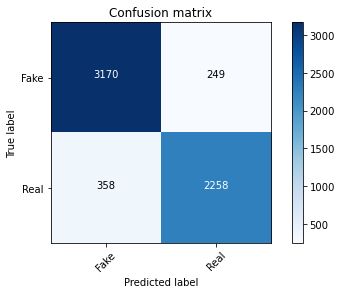

In [46]:
print(score)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [47]:
# This below classifier that works good on text data
from sklearn.linear_model import PassiveAggressiveClassifier

In [48]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.941
Confusion matrix, without normalization


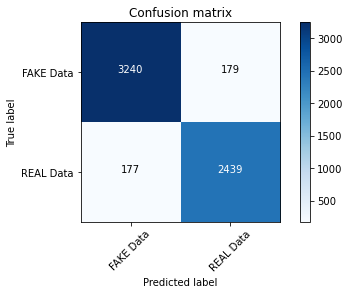

In [49]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [50]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\prati\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.9010770505385253
Alpha: 0.1, Score : 0.9000828500414251
Alpha: 0.2, Score : 0.899917149958575
Alpha: 0.30000000000000004, Score : 0.899917149958575
Alpha: 0.4, Score : 0.899917149958575
Alpha: 0.5, Score : 0.899751449875725
Alpha: 0.6000000000000001, Score : 0.899751449875725
Alpha: 0.7000000000000001, Score : 0.899751449875725
Alpha: 0.8, Score : 0.899751449875725
Alpha: 0.9, Score : 0.8994200497100249


In [51]:
feature_names = cv.get_feature_names()

In [52]:
classifier.coef_[0]

array([-10.68418389,  -9.13528319,  -9.27884134, ...,  -8.93407232,
        -8.22864764,  -9.04082889])

In [53]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.076660766219632, 'trump'),
 (-5.08335612767174, 'clinton'),
 (-5.27427719824313, 'one'),
 (-5.28181105760693, 'peopl'),
 (-5.299079533414011, 'state'),
 (-5.412332563582744, 'us'),
 (-5.420865858957265, 'would'),
 (-5.502177743471869, 'hillari'),
 (-5.525356361134659, 'like'),
 (-5.530865350666565, 'time'),
 (-5.633207838844511, 'year'),
 (-5.639947014318752, 'elect'),
 (-5.690806215544992, 'american'),
 (-5.691280643867772, 'said'),
 (-5.782472392197622, 'new'),
 (-5.804547957104047, 'use'),
 (-5.813266253020423, 'also'),
 (-5.8220612266090725, 'go'),
 (-5.830206952628716, 'govern'),
 (-5.83057052950196, 'presid')]

In [54]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-14.548416234396877, 'brief post'),
 (-14.548416234396877, 'day mr'),
 (-14.548416234396877, 'devo'),
 (-14.548416234396877, 'follow pam'),
 (-14.548416234396877, 'follow pam key'),
 (-14.548416234396877, 'gorsuch'),
 (-14.548416234396877, 'judg gorsuch'),
 (-14.548416234396877, 'key twitter'),
 (-14.548416234396877, 'key twitter pamkeynen'),
 (-14.548416234396877, 'morn brief'),
 (-14.548416234396877, 'mr bannon'),
 (-14.548416234396877, 'mr castro'),
 (-14.548416234396877, 'mr christi'),
 (-14.548416234396877, 'mr cruz'),
 (-14.548416234396877, 'mr kushner'),
 (-14.548416234396877, 'mr roof'),
 (-14.548416234396877, 'mr sander'),
 (-14.548416234396877, 'mr scott'),
 (-14.548416234396877, 'mr session'),
 (-14.548416234396877, 'mr spicer'),
 (-14.548416234396877, 'mr xi'),
 (-14.548416234396877, 'ms trump'),
 (-14.548416234396877, 'pam key'),
 (-14.548416234396877, 'pam key twitter'),
 (-14.548416234396877, 'pamkeynen'),
 (-14.548416234396877, 'said ms'),
 (-14.548416234396877, 'sean

In [55]:
# Lets try tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
X = news_data['stem_text']
y = news_data['label']

In [57]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [58]:
X = tfidf.fit_transform(X).toarray()

In [59]:
X.shape

(18285, 5000)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
tfidf.get_feature_names()[:15]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus']

In [62]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [63]:
count_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names())

In [64]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.062188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.046317,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.021997,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [65]:
classifier=MultinomialNB()

accuracy:   0.899
Confusion matrix, without normalization


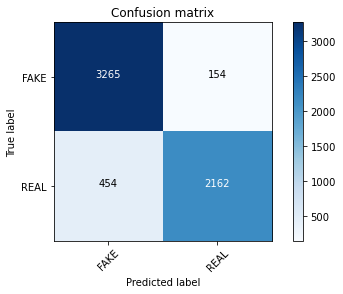

In [66]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [67]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.8992543496271748

In [68]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\prati\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.9030654515327258
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9012427506213753
Alpha: 0.30000000000000004, Score : 0.9009113504556753
Alpha: 0.4, Score : 0.9009113504556753
Alpha: 0.5, Score : 0.9007456503728252
Alpha: 0.6000000000000001, Score : 0.9004142502071251
Alpha: 0.7000000000000001, Score : 0.899751449875725
Alpha: 0.8, Score : 0.8994200497100249
Alpha: 0.9, Score : 0.8995857497928749


In [69]:
## Get Features names
feature_names = cv.get_feature_names()

In [70]:
classifier.coef_[0]

array([-9.62635269, -8.95025764, -8.72300467, ..., -8.98828017,
       -8.21011972, -8.47087948])

In [71]:
# This is yet another vectorizer known to work nicely on text
from sklearn.feature_extraction.text import HashingVectorizer

In [72]:
hs_vectorizer = HashingVectorizer(n_features=5000, alternate_sign=False)

In [73]:
X = hs_vectorizer.fit_transform(news_data['stem_text']).toarray()

In [74]:
X.shape

(18285, 5000)

In [75]:
X

array([[0.        , 0.15922347, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03785056, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02285155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06880662, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

accuracy:   0.883
Confusion matrix, without normalization


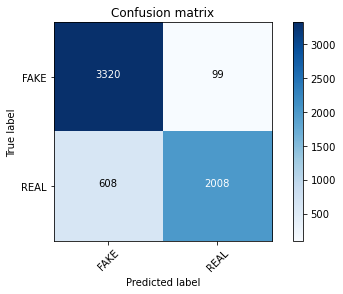

In [77]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])